In [2]:
!pip install kaggle numpy pandas scikit-learn joblib matplotlib seaborn


import os


!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d atharvaingle/crop-recommendation-dataset


!unzip -o crop-recommendation-dataset.zip -d data/


The syntax of the command is incorrect.
'mv' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


Dataset URL: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
License(s): apache-2.0
crop-recommendation-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
df = pd.read_csv("Crop_recommendation.csv")
print("Shape:", df.shape)
df.head()


Shape: (2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100


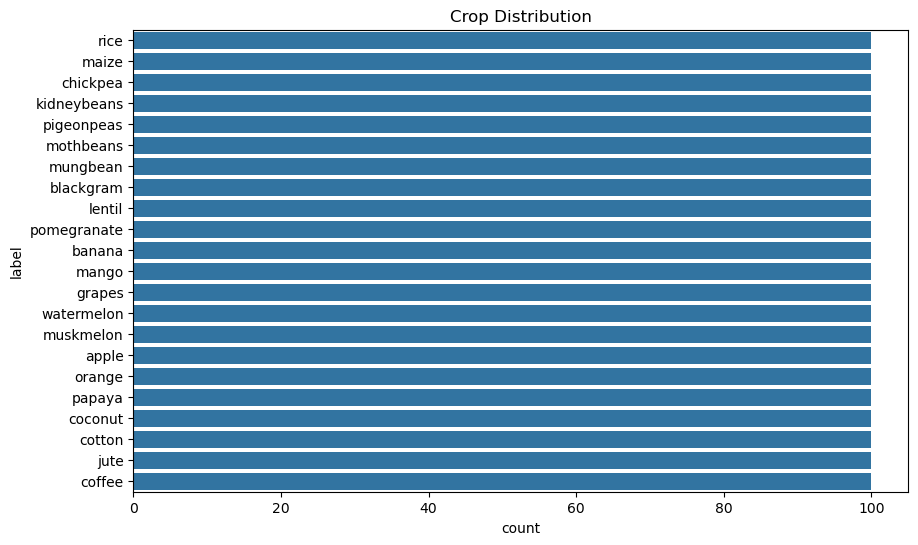

In [6]:
print(df.info())
print(df['label'].value_counts())

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='label', order=df['label'].value_counts().index)
plt.title("Crop Distribution")
plt.show()


In [7]:

X = df[['N','P','K','temperature','humidity','ph','rainfall']]
y = df['label']

le = LabelEncoder()
y_enc = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)


In [8]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


✅ Accuracy: 0.9954545454545455

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00  

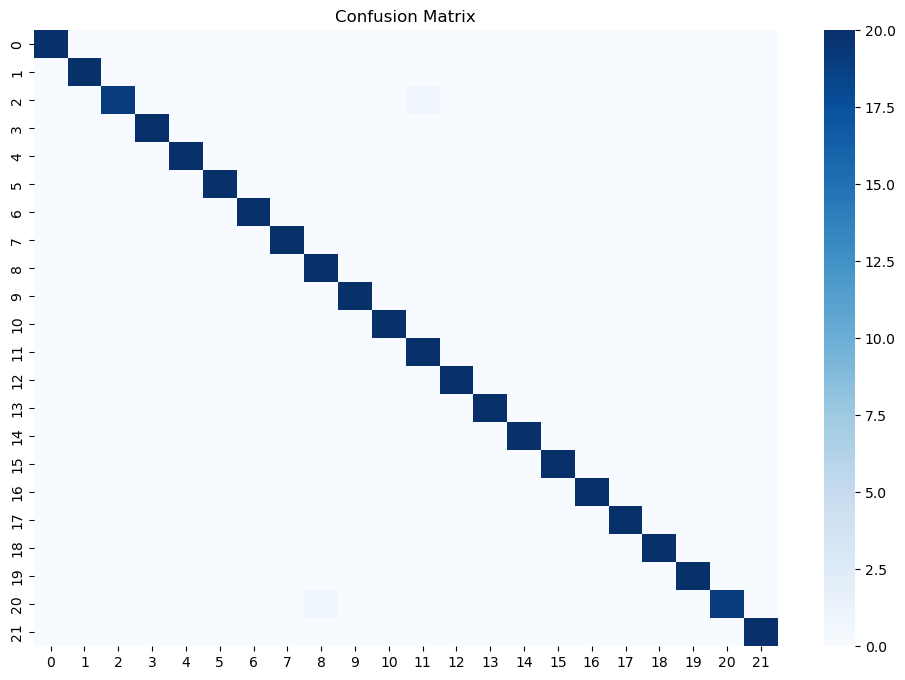

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [10]:
def predict_crop(sample):
    """
    sample = dict with keys: N, P, K, temperature, humidity, ph, rainfall
    returns: best predicted crop + top 3 probabilities
    """
    x = [[sample['N'], sample['P'], sample['K'], sample['temperature'],
          sample['humidity'], sample['ph'], sample['rainfall']]]
    x_scaled = scaler.transform(x)
    probs = model.predict_proba(x_scaled)[0]
    idx = np.argmax(probs)
    pred_crop = le.inverse_transform([idx])[0]
    # top 3 crops
    top3 = sorted(
        [(le.classes_[i], float(probs[i])) for i in range(len(probs))],
        key=lambda x: x[1], reverse=True
    )[:3]
    return pred_crop, top3

sample = {
    "N": 90, "P": 40, "K": 40,
    "temperature": 25, "humidity": 70,
    "ph": 6.5, "rainfall": 150
}

predict_crop(sample)


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


('coffee', [('coffee', 0.495), ('jute', 0.495), ('maize', 0.005)])

In [12]:
from joblib import dump

dump({"model": model, "scaler": scaler, "label_encoder": le}, "crop_recommender.joblib")
print("Model saved as crop_recommender.joblib")


Model saved as crop_recommender.joblib
